In [1]:
from evaluate import computeScores
import json
from tqdm import tqdm
import os
from os import listdir
from evaluate import analyse


In [2]:
# Noise Experiment 

# Query Folders to be named as pitch_extranotes_deleted

collection_dir="Text/Original Collection"

query_folders_location="Text/Noisy Queries"

for query_dir in tqdm(listdir(query_folders_location)[:10]):
    output_dir=f"Results/NoisyResults/{query_dir}"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    query_dir=f"{query_folders_location}/{query_dir}"
    computeScores(query_dir,collection_dir,num_queries=2,num_collection=909,similarity_type="text",output_dir=output_dir,stride_length=10)

100%|██████████| 10/10 [03:40<00:00, 22.06s/it]


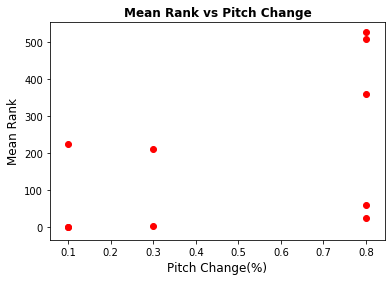

In [15]:
# Analysing trends with respect to noise functions-Plot Mean Rank
import pandas as pd
import matplotlib.pyplot as plt


metric="Mean Rank"
noise="Pitch Change"
output_dir="Results/NoisyGraphs"
#result_folders=["Results/NoisyResults/1_2_3","Results/NoisyResults/5_6_8"]



result_folders=[f"Results/NoisyResults/{query_dir}" for query_dir in listdir("Results/NoisyResults")]

noise2index={
    "Pitch Change":0,
    "Extra Notes":1,
    "Delete Notes":2,
}


metric2index={
    "Recall@1":0,
    "Recall@3":1,
    "Recall@5":2,
    "Recall@10":3,
    "Mean Rank":4,
    "Normalised Similarity":5,
    "Margin of Error":6,
    "Average Confidence":7,
    "MRR":8
}

metric_index=metric2index[metric]
noise_index=noise2index[noise]

noise_dict={}

for folder in result_folders:
    noise_value=float(folder.split("/")[-1].split("_")[noise_index])
    try:
        df=pd.read_csv(f"{folder}/analysis.csv")
        metric_value=df.iloc[metric_index]["Value"]
        noise_dict[noise_value]=metric_value
        plt.scatter(noise_value,metric_value,c="r")
    except:
        print(folder)

X=list(noise_dict.keys())
Y=list(noise_dict.values())


plt.title(f"{metric} vs {noise}", fontsize=12, weight='bold')
plt.xlabel(f"{noise}(%)", fontsize=12)
plt.ylabel(f"{metric}", fontsize=12)
plt.savefig(f"{output_dir}/{metric}VS{noise}.png".replace(" ",""))